In [1]:
# pip install nbconvert

In [3]:
# brew install mactex

In [5]:
# Step 1: Import libraries we need
import pandas as pd  # For handling data tables
import numpy as np   # For math operations
import tensorflow as tf  # For building the neural network
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.preprocessing import StandardScaler  # To scale numbers
import matplotlib.pyplot as plt  # For plotting graphs

In [6]:
# Step 2: Load the dataset
# The CSV file has customer data; we load it into a table called a DataFrame
df = pd.read_csv("Churn_Modelling.csv")

# Step 3: Remove columns we don't need
# Columns like RowNumber, CustomerId, and Surname are not useful for prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Step 4: Convert categories to numbers
# Geography (e.g., France, Germany) and Gender (Male, Female) are text; we convert them to numbers
# We use numbers (0, 1, 2) to represent categories
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [7]:
# Step 5: Split data into features (X) and target (y)
# Features (X) are inputs like CreditScore, Age, etc.
# Target (y) is what we predict: Exited (0 = stay, 1 = leave)
X = df.drop('Exited', axis=1)  # All columns except Exited
y = df['Exited']  # Only the Exited column

# Step 6: Split data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Step 7: Scale the features
# Make all numbers similar in size (e.g., CreditScore and Balance have different ranges)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Learn scaling from training data and apply it
X_test = scaler.transform(X_test)  # Apply same scaling to test data

In [9]:
# Step 8a: Instantiate the neural network
# Create an empty neural network model (like setting up a blank brain)
model = tf.keras.Sequential()

# Step 8b: Initialize the neural network layers
# Add layers to the model to process data and make predictions
model.add(tf.keras.layers.Dense(6, activation='relu', input_shape=(10,)))  # First layer: 6 neurons, takes 10 inputs
model.add(tf.keras.layers.Dense(6, activation='relu'))  # Second layer: 6 neurons
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer: 1 neuron for 0 or 1

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Step 9: Compile the model
# Tell the model how to learn and measure performance
model.compile(optimizer='adam',  # Adam helps the model learn
              loss='binary_crossentropy',  # Suitable for yes/no predictions
              metrics=['accuracy'])  # Track how many predictions are correct


In [17]:
# Step 10: Train the model
# Let the model learn from the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5706 - loss: 0.7549 - val_accuracy: 0.8085 - val_loss: 0.4969
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8040 - loss: 0.4851 - val_accuracy: 0.8160 - val_loss: 0.4414
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8158 - loss: 0.4503 - val_accuracy: 0.8230 - val_loss: 0.4230
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8221 - loss: 0.4269 - val_accuracy: 0.8290 - val_loss: 0.4150
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8198 - loss: 0.4216 - val_accuracy: 0.8335 - val_loss: 0.4078
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8275 - loss: 0.4066 - val_accuracy: 0.8385 - val_loss: 0.4014
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8238 - loss: 0.4081 - val_accuracy: 0.8435 - val_loss: 0.3937
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8336 - loss: 0.3995 - 

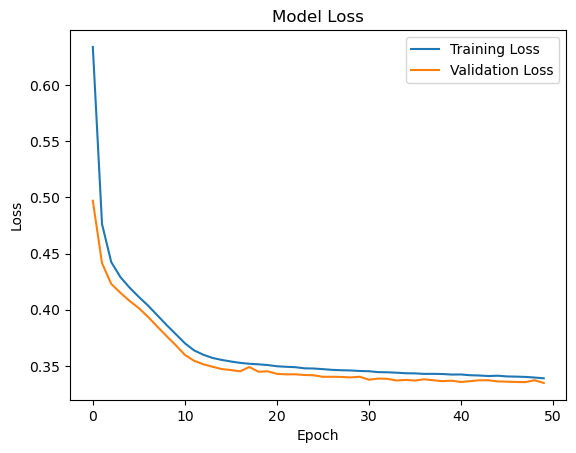

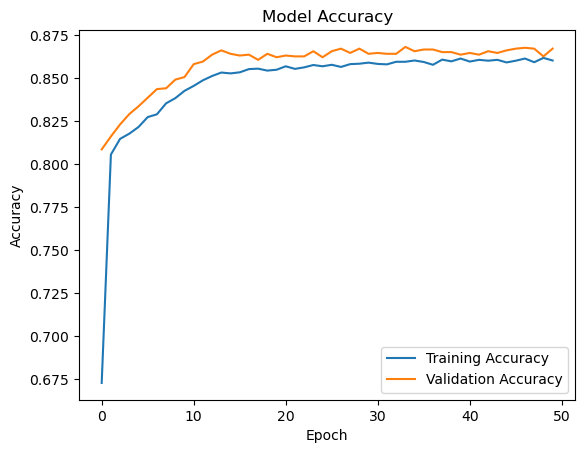

In [19]:
# Step 11: Plot training results
# Show how the model's error (loss) changes over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('loss_plot.png')  # Save the plot
# plt.close()
plt.show()

# Plot how the model's accuracy changes
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig('accuracy_plot.png')  # Save the plot
# plt.close()

In [21]:
# Step 12: Predict for a new customer
# Ask user for customer details
print("Enter customer details to predict if they will leave:")
credit_score = float(input("Credit Score (e.g., 600): "))
geography = float(input("Geography (0 for France, 1 for Germany, 2 for Spain): "))
gender = float(input("Gender (0 for Female, 1 for Male): "))
age = float(input("Age (e.g., 40): "))
tenure = float(input("Tenure (years with bank, e.g., 3): "))
balance = float(input("Balance (e.g., 60000): "))
num_products = float(input("Number of Products (e.g., 2): "))
has_cr_card = float(input("Has Credit Card (0 for No, 1 for Yes): "))
is_active = float(input("Is Active Member (0 for No, 1 for Yes): "))
salary = float(input("Estimated Salary (e.g., 50000): "))

# Create an array with the input data
user_input = np.array([[credit_score, geography, gender, age, tenure, balance,
                        num_products, has_cr_card, is_active, salary]])

# Scale the input data to match training data
user_input_scaled = scaler.transform(user_input)

Enter customer details to predict if they will leave:


Credit Score (e.g., 600):  500
Geography (0 for France, 1 for Germany, 2 for Spain):  1
Gender (0 for Female, 1 for Male):  1
Age (e.g., 40):  40
Tenure (years with bank, e.g., 3):  2
Balance (e.g., 60000):  5000
Number of Products (e.g., 2):  1
Has Credit Card (0 for No, 1 for Yes):  1
Is Active Member (0 for No, 1 for Yes):  1
Estimated Salary (e.g., 50000):  50000


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Make prediction (model gives a number between 0 and 1)
prediction = model.predict(user_input_scaled)

# Explain the prediction: above 0.5 means likely to leave, below means likely to stay
chance = prediction[0][0]  # Get the model's output (a number showing likelihood of leaving)
if chance > 0.5:
    result = "will likely leave"
    explanation = f"The model says there's a {chance*100:.1f}% chance the customer will leave. Since this is over 50%, they are likely to leave."
else:
    result = "will likely stay"
    explanation = f"The model says there's a {chance*100:.1f}% chance the customer will leave. Since this is under 50%, they are likely to stay."

# Show the result
print(f"Prediction: The customer {result}")
print(explanation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: The customer will likely stay
The model says there's a 38.3% chance the customer will leave. Since this is under 50%, they are likely to stay.


Additional Layering Techniques:
Batch Normalization:
What it is: Normalizes activations of each layer to have a mean of 0 and standard deviation of 1, reducing the internal covariate shift and speeding up training.

When to use: When the model is very deep and the training is unstable or slow.

Dropout Layer:
What it is: Randomly drops a fraction of neurons during training to prevent overfitting.

When to use: When you want to reduce overfitting, especially in deep networks.

In [26]:
"""
# Step 8b: Initialize the neural network layers
# Add layers to process data, including batch normalization and dropout to improve learning
model.add(tf.keras.layers.Dense(6, activation='relu', input_shape=(10,)))  # First layer: 6 neurons, takes 10 inputs
model.add(tf.keras.layers.BatchNormalization())  # Normalize data to make training stable
model.add(tf.keras.layers.Dropout(0.2))  # Randomly ignore 20% of neurons to prevent overfitting
model.add(tf.keras.layers.Dense(6, activation='relu'))  # Second layer: 6 neurons
model.add(tf.keras.layers.BatchNormalization())  # Normalize again for stability
model.add(tf.keras.layers.Dropout(0.2))  # Ignore 20% of neurons again
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer: 1 neuron for 0 or 1
"""

"\n# Step 8b: Initialize the neural network layers\n# Add layers to process data, including batch normalization and dropout to improve learning\nmodel.add(tf.keras.layers.Dense(6, activation='relu', input_shape=(10,)))  # First layer: 6 neurons, takes 10 inputs\nmodel.add(tf.keras.layers.BatchNormalization())  # Normalize data to make training stable\nmodel.add(tf.keras.layers.Dropout(0.2))  # Randomly ignore 20% of neurons to prevent overfitting\nmodel.add(tf.keras.layers.Dense(6, activation='relu'))  # Second layer: 6 neurons\nmodel.add(tf.keras.layers.BatchNormalization())  # Normalize again for stability\nmodel.add(tf.keras.layers.Dropout(0.2))  # Ignore 20% of neurons again\nmodel.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer: 1 neuron for 0 or 1\n"

In [28]:
# pip install pydot

In [30]:
# pip install graphviz

In [32]:
# Step 9: Visualize the neural network
# Save a picture of the model to see its structure

from tensorflow.keras.utils import plot_model  # To visualize the neural network
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Add this after Step 8b to visualize the neural network in the notebook

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [34]:
# pip install graphviz

1. Why is Batch Normalization Needed When We Already Use StandardScaler?
Answer: Batch Normalization Clarification:
StandardScaler is a preprocessing step for inputs; batch normalization is an internal mechanism for layers. Both are complementary, not redundant.
In our code, batch normalization after each hidden layer stabilizes training for the churn dataset, but you could experiment with fewer (e.g., only after the first Dense layer) for simpler models.

2. Do We Have to Batch Normalize After Creating Each Layer? What’s the Logic, When to Normalize, and the Concept?

Concept of Batch Normalization:

What It Does: 

For each mini-batch, batch normalization standardizes the output of a layer (mean = 0, standard deviation = 1) and then applies a learnable scale and shift (parameters gamma and beta). This ensures consistent inputs to the next layer.

Purpose:
Stabilizes Learning: Prevents large swings in layer outputs, making training faster and more reliable.
Reduces Sensitivity: Makes the model less dependent on initial weights or learning rates.
Regularization Effect: Slightly reduces overfitting by adding noise during training (similar to dropout).
Analogy: It’s like a teacher adjusting lessons to match students’ understanding, ensuring each step is clear before moving on.

Do We Normalize After Each Layer?:

Not Always Necessary: You don’t have to add batch normalization after every layer. It’s a design choice based on the model and problem.
Common Practice:
In our code, we added batch normalization after each hidden layer (Dense layers with 6 neurons)

In the context of the ChurnModellingANN neural network code, where we used batch normalization to stabilize training, you’ve asked about beta and gamma and what it means when batch normalization “shifts” them. I’ll explain these terms clearly and concisely for a beginner, tying them to our churn prediction model, and address how they are used in batch normalization. Since you’ve specifically asked about beta and gamma, I’ll focus on their role without repeating the full code or unrelated details.

What are Beta and Gamma in Batch Normalization?
Batch Normalization Overview:

In our code, we added batch normalization layers after the hidden Dense layers:
pythonCopymodel.add(tf.keras.layers.BatchNormalization())  # Normalize data to make training stable

Batch normalization standardizes the output of a layer (e.g., the 6 neurons’ outputs) for each mini-batch (32 data points in our case) to have a mean of 0 and a standard deviation of 1. Then, it applies a scale and shift to these normalized values using gamma and beta, respectively.
Purpose: This ensures the layer’s outputs are stable and consistent, helping the neural network learn faster and perform better for churn prediction.

Beta and Gamma Explained:

Gamma (γ):

What it is: A learnable parameter that scales (stretches or shrinks) the normalized output.
Role: After batch normalization makes the output have a standard deviation of 1, gamma decides how much to amplify or reduce this spread. For example, if gamma = 2, the output’s spread doubles; if gamma = 0.5, it halves.
Why needed: Different layers may need outputs with different scales to learn effectively. Gamma gives the model flexibility to adjust the normalized data to what’s best for predicting churn.
In our code: For each of the 6 neurons in a hidden layer, gamma is a number that the model learns during training to scale their normalized outputs.


Beta (β):

What it is: A learnable parameter that shifts (moves up or down) the normalized output.
Role: After normalization sets the mean to 0, beta adds or subtracts a value to shift the mean to a new position. For example, if beta = 3, the output’s mean becomes 3; if beta = -1, it becomes -1.
Why needed: Shifting allows the model to position the output in a range that’s useful for the next layer. This is crucial for learning patterns in the churn dataset (e.g., whether a customer will leave).
In our code: For each of the 6 neurons, beta is a number learned during training to shift their normalized outputs.


Learn: During training (via model.fit()), the model adjusts gamma and beta using backpropagation to minimize the loss (binary cross-entropy in our case), just like it adjusts weights in Dense layers.

In [39]:
jupyter nbconvert --to pdf notebook_name.ipynb

SyntaxError: invalid syntax (2618269579.py, line 1)